# **Bài tập Colab**
# **Vẽ Scatter plot**

> Vẽ các scatter plot thể hiện mối liên hệ giữa những thông số có thể tính được từ dữ liệu wecode.csv đến điểm thi cuối kỳ của sinh viên.


In [44]:
# Liên kết với drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data1 = pd.read_csv('/content/drive/MyDrive/ML_Raw/wecode.csv')
data2 = pd.read_csv('/content/drive/MyDrive/ML_Raw/score_training.csv')

In [46]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Xử lý dữ liệu - loại bỏ các giá trị rỗng khỏi cột CK trong file score_training
# Merge file wecode với file score_training theo user_id
data2 = data2[data2['CK'].notna()]
data2 = data2[data2.CK != '\xa0']
data2 = data2.rename(columns={"id": "user_id"})
merge1 = pd.merge(data1, data2, on='user_id')
merge1

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at,QT,GK,TH,CK,TBM,TBTL
0,15,7,10,1439,0,Compilation Error,0,100,solution-0,2,2020-11-02 04:14:31,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41
1,17,7,10,1439,0,Compilation Error,0,100,solution-2,2,2020-11-02 04:16:39,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41
2,22,7,1,1439,0,Compilation Error,0,100,solution-upload-7,2,2020-11-02 04:19:08,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41
3,26,7,10,1439,0,Compilation Error,0,100,solution-11,2,2020-11-02 04:20:59,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41
4,45,7,10,1439,0,Compilation Error,0,100,solution-30,2,2020-11-02 04:31:45,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192596,266033,383,313,1452,1,SCORE,10000,100,solution-3261,2,2021-03-20 16:27:47,2021-03-20 16:27:56,0,9,8,6,6.6,7.05
192597,266034,383,318,1452,1,SCORE,10000,100,solution-3262,2,2021-03-20 16:28:19,2021-03-20 16:28:33,0,9,8,6,6.6,7.05
192598,266036,383,319,1452,1,SCORE,10000,100,solution-3264,2,2021-03-20 16:28:46,2021-03-20 16:28:55,0,9,8,6,6.6,7.05
192599,266037,383,317,1452,1,SCORE,10000,100,solution-3265,2,2021-03-20 16:29:00,2021-03-20 16:29:07,0,9,8,6,6.6,7.05


# **Scatter plot 1**

> Thể hiện giữa số lượng bài nộp lần cuối (is_final == 1) có số phần trăm test đúng cao nhất (pre_score == 10000) và điểm số cuối kỳ (CK) của sinh viên (user_id)

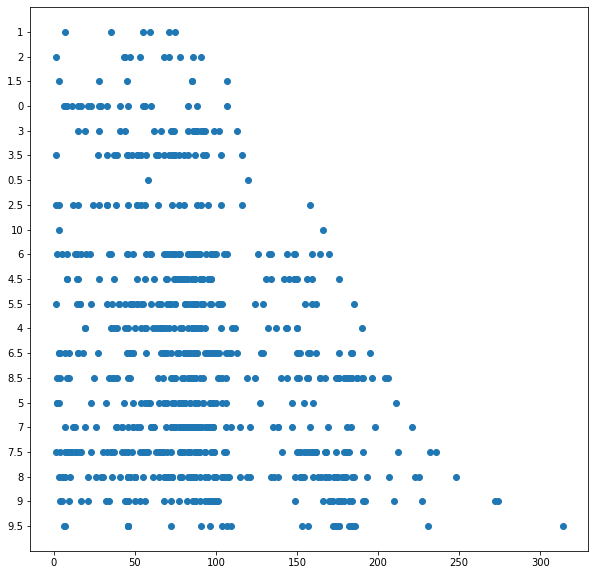

In [32]:
# data2 = data2[data2['CK'].notna()]
# data1 = data1.loc[(data1['is_final'] == 1) & (data1['pre_score'] == 10000)]
# data2 = data2.rename(columns={"id": "user_id"})
# merge1 = pd.merge(data1, data2, on='user_id')


# test = merge1['user_id'].value_counts()
# test = test.to_frame().reset_index()
# test = test.rename(columns={"index": "user_id","user_id": "count"})

# merge2 = pd.merge(test, data2, on='user_id')
# plt.figure(figsize=(10,10))
# plt.scatter(merge2['count'].tolist(),merge2['CK'].tolist())
# plt.show()

> **Nhận xét**

# **Scatter plot 2**

> Thể hiện sự phân bố điểm cuối kỳ (CK) theo số phần trăm test đúng (pre_score) và hệ số nộp bài trễ (coefficient)

In [35]:
# Kiểm tra dữ liệu - lấy những giá trị (không lặp) của điểm CK và làm tròn số
clus_ck = merge1[['user_id','CK']]
clus_ck['CK'].replace({"0.5": "1","1.5": "2","2.5": "3","3.5": "4", "4.5": "5","5.5": "6","6.5": "7","7.5": "8" ,"8.5": "9",'9.5':'10'}, inplace=True)
clus_ck = clus_ck[['CK']]
merge1['cluss'] = clus_ck

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [36]:
merge1['coefficient'].replace({'error':'-1'},inplace=True)

In [37]:
# pre_score - coefficient ->>>> CK
X1 = merge1.iloc[:,[6,7]].values.astype(float)
Y1 = merge1.iloc[:,18].values.astype(float)

0 0.0-----1 1.0-----2 2.0-----3 3.0-----4 4.0-----5 5.0-----6 6.0-----7 7.0-----8 8.0-----9 9.0-----10 10.0-----

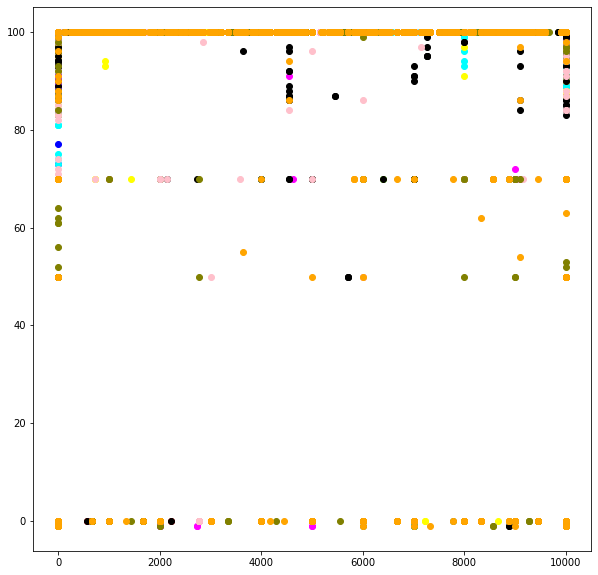

In [39]:
# Tạo tập nhãn, ứng với mỗi nhãn gán một màu
# (1-red | 2-green | 3-blue | 4-cyan | 5-magenta | 6-yellow | 7-black | 8-pink | 9-oliver | 10-orange)
# Visualize điểm cuối kỳ (CK) theo cặp giá trị (Pre_score;coeffient)
from matplotlib.colors import ListedColormap
def VisualizingDataset(X_,Y_):
    X1=X_[:,0]
    X2=X_[:,1]
    for i,label in enumerate(np.unique(Y_)):
        print(i,label,end='-----')
        plt.scatter(X1[Y_==label],X2[Y_==label],color=ListedColormap(("red","green",'blue','cyan','magenta','yellow','black','pink','olive','orange'))(i),label=label)
plt.figure(figsize=(10,10))
VisualizingDataset(X1,Y1)

> **Nhận xét**

> Khoảng màu cam (điểm 9.5 - 10) phân bố nhiều ở đoạn coeffient = 100, trải dài theo số phần trăm test đúng từ thấp đến cao (0 -> 10000), tức khả năng sinh viên có điểm cuối kỳ đạt từ 9.5 đến 10 điểm sẽ là những sinh viên nộp bài đúng hạn, không kể đến tỉ lệ đúng

> Những màu khác (dưới 9.5 điểm) phân bố rải rác, như vậy khi sinh viên nộp bài càng trễ hạn và số phần trăm test đúng càng ít thì khả năng đạt điểm 10 cuối kỳ của sinh viên cũng giảm theo

# **Scatter plot 3**

> Thể hiện giữa số lượng bài nộp lần cuối (is_final == 1) với số phần trăm test đúng (pre_score) bất kỳ và điểm số cuối kỳ (CK)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


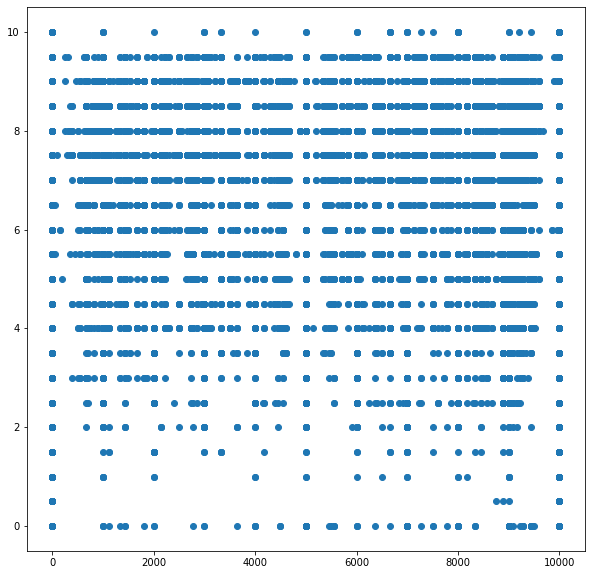

In [40]:
#pre_score-is_finall==1 ->>>>- CK
tb2 = merge1.loc[(data1['is_final'] == 1)]
plt.figure(figsize=(10,10))
tb2["CK"] = tb2.CK.astype(float)
tb2=tb2.sort_values('CK')
plt.scatter(tb2['pre_score'].tolist(),tb2['CK'].tolist())
plt.show()

> **Nhận xét**

> Từ Scatter plot 1 và Scatter plot 3, nhận xét: Sinh viên dù lần cuối nộp bài (is_final == 1) có số phần trăm test đúng thấp (pre_score < 10000) vẫn có thể đạt 10 điểm cuối kỳ

# **Scatter plot 4**

> Thể hiện giữa thời gian chạy chương trình (updated_at - created_at) của submission đã được chấm (status = SCORE) và điểm cuối kỳ (CK)

In [48]:
df = pd.DataFrame(columns = ["times"])
from datetime import datetime
for i in range(0, len(merge1['created_at'].index)):
  date = (datetime.strptime(merge1.iloc[i][11],"%Y-%m-%d %H:%M:%S")-datetime.strptime(merge1.iloc[i][10],"%Y-%m-%d %H:%M:%S")).seconds
  df = df.append({'times':date}, ignore_index=True)
merge1.insert(3,"times",df,True)

In [ ]:
merge1

,id,assignment_id,problem_id,times,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at,QT,GK,TH,CK,TBM,TBTL,cluss
0,15,7,10,34769,1439,0,Compilation Error,0,100,solution-0,2,2020-11-02 04:14:31,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41,9
1,17,7,10,34641,1439,0,Compilation Error,0,100,solution-2,2,2020-11-02 04:16:39,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41,9
2,22,7,1,34492,1439,0,Compilation Error,0,100,solution-upload-7,2,2020-11-02 04:19:08,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41,9
3,26,7,10,34381,1439,0,Compilation Error,0,100,solution-11,2,2020-11-02 04:20:59,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41,9
4,45,7,10,33735,1439,0,Compilation Error,0,100,solution-30,2,2020-11-02 04:31:45,2020-11-03 13:54:00,6,7,6.5,8.5,7.4,7.41,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192596,266033,383,313,9,1452,1,SCORE,10000,100,solution-3261,2,2021-03-20 16:27:47,2021-03-20 16:27:56,0,9,8,6,6.6,7.05,6
192597,266034,383,318,14,1452,1,SCORE,10000,100,solution-3262,2,2021-03-20 16:28:19,2021-03-20 16:28:33,0,9,8,6,6.6,7.05,6
192598,266036,383,319,9,1452,1,SCORE,10000,100,solution-3264,2,2021-03-20 16:28:46,2021-03-20 16:28:55,0,9,8,6,6.6,7.05,6
192599,266037,383,317,7,1452,1,SCORE,10000,100,solution-3265,2,2021-03-20 16:29:00,2021-03-20 16:29:07,0,9,8,6,6.6,7.05,6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


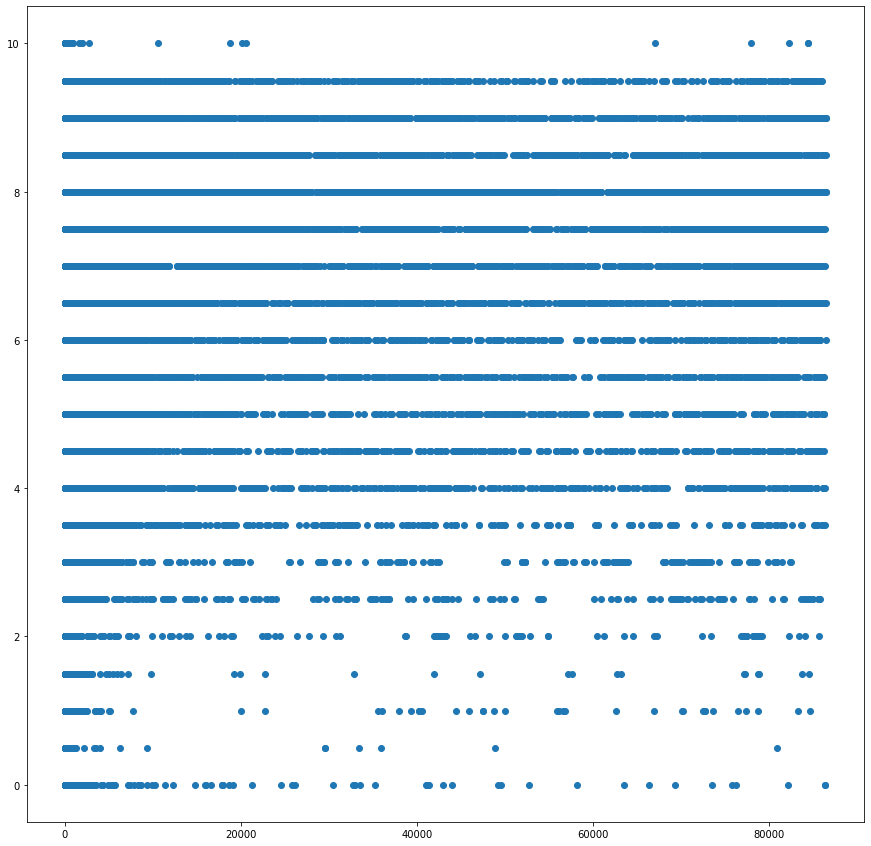

In [ ]:
#times->>>>>-CK
tb3 = merge1.loc[(merge1['status'] == 'SCORE')]
tb3["CK"] = tb3.CK.astype(float)
tb3=tb3.sort_values('CK')
plt.figure(figsize=(15,15))
plt.scatter(tb3['times'].tolist(),tb3['CK'].tolist())
plt.show()

> **Nhận xét**

> Những sinh viên có lượng bài submission đã được chấm điểm, với thời gian chạy chương trình càng đa dạng từ nhanh đến chậm (0s -> 80000s) thì có khả năng đạt điểm thi cuối kỳ từ 4 điểm đến 9.5

> Tồn tại những trường hợp ngoại lệ khi lượng bài submission đã được chấm điểm của sinh viên chỉ thuộc đoạn có thời gian chạy rất nhanh (khoảng 0s) thì khả năng sinh viên đó thi cuối kỳ đạt xuất sắc, 10 điểm hoặc không đạt, từ 0 đến 2 điểm


# **Scatter plot 5**

> Thể hiện sự phân bố điểm cuối kỳ (CK) theo số phần trăm test đúng (pre_score) và thời gian chạy chương trình (updated_at - created_at) của submission đã được chấm (status = SCORE)

In [ ]:
np.unique(tb4['times'])

array([1, 2, 3, ..., 86378, 86393, 86399], dtype=object)

In [ ]:
tb4.iloc[:,[3,7]]

,times,pre_score
10,32828,0
11,18958,10000
14,17663,0
16,16589,5000
17,16413,0
...,...,...
192596,9,10000
192597,14,10000
192598,9,10000
192599,7,10000


0 0.0-----1 1.0-----2 2.0-----3 3.0-----4 4.0-----5 5.0-----6 6.0-----7 7.0-----8 8.0-----9 9.0-----10 10.0-----

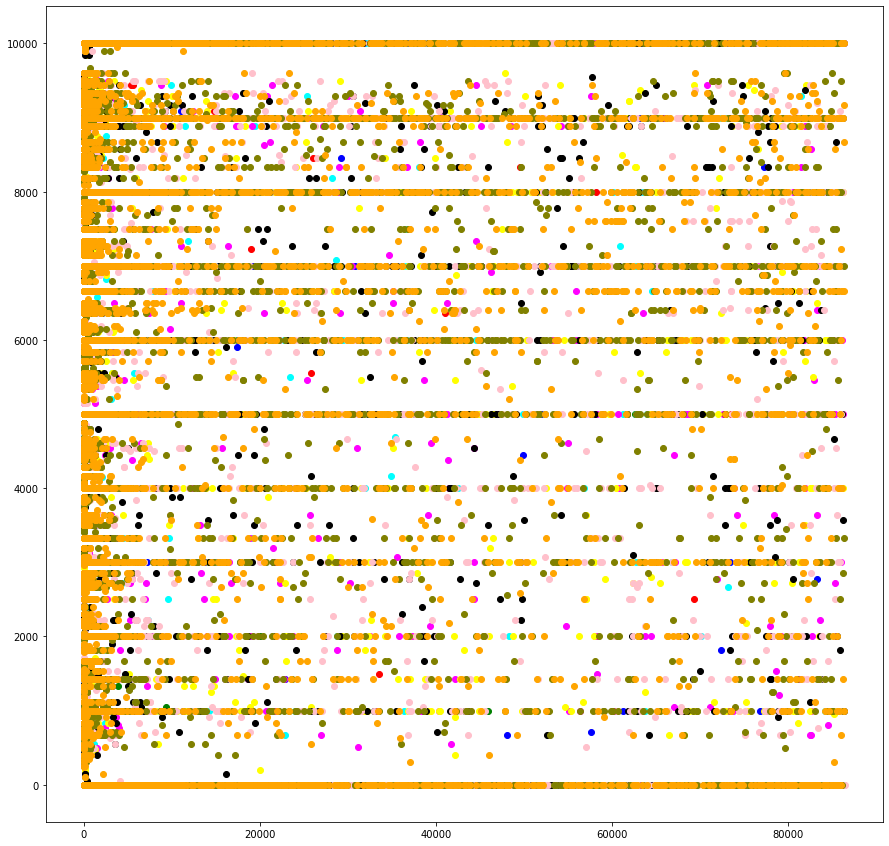

In [ ]:
tb4 = merge1.loc[(merge1['status'] == 'SCORE')]
X1 = tb4.iloc[:,[3,7]].values.astype(float)
y2 = tb4.iloc[:,19].values.astype(float)
plt.figure(figsize=(15,15))
VisualizingDataset(X1,y2)
plt.y
plt.show()

> **Nhận xét**

> Khi thời gian chạy chương trình rất nhanh (khoảng 0s), thì khoảng màu cam ( từ 9.5-10 điểm) trải dài theo số phần trăm test đúng từ thấp đến cao (0 -> 10000), tức những sinh viên nộp bài submission đã được chấm điểm có thời gian chạy nhanh, dù số phần trăm test đúng bất kì, thì vẫn có nhiều khả năng đạt điểm 10 cuối kỳ

> Ở các mốc 0, các số tròn ngìn, 10000 của cột phần trăm test đúng, khoảng màu cam (từ 9.5-10 điểm) xuất hiện nhiều, xuyên suốt cột thời gian chạy, như vậy khi sinh viên có lượng bài submission đã được chấm điểm với số phần trăm test đúng thuộc vào khoảng 0; 1000; 2000; ...; 10000 thì khả năng cao sinh viên đó thi cuối kỳ được 10 điểm

> Những màu khác (dưới 9.5 điểm) phân bố rải rác, như vậy khi sinh viên có lượng bài submission đã được chấm điểm có thời gian chạy càng chậm và số phần trăm test đúng không thuộc vào các mốc, thì khả năng cuối kỳ của sinh viên đạt được 10 điểm cũng giảm theo

# **Kết luận**

> Qua các Scattr plot, nhận xét thấy các thuộc tính is_final,	status,	pre_score,	coefficient,	created_at,	updated_at, đều có liên quan đến điểm cuối kỳ của sinh viên